# Integer linear programming experiments for vertex cover problems
// TODO Simple description of the project to add.

First of all, import the Python libraries used in the process of data analysis.

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import pyvis
import matplotlib as mp
import matplotlib.pyplot as plt
from matplotlib import cm
import params as pr
from mpl_toolkits import mplot3d
import networkx as nx

/Users/jake/.pyenv/versions/thesis/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Import experimental data from the corresponding csv files. The data are splitted over multiple csv file, one for each graph class studied. The first three rows of one of these files are displayed below, to give an idea of the file structure.

In [2]:
gnp_data = pd.read_csv('data/gnp.csv')
bag_data = pd.read_csv('data/bag.csv')
rrg_data = pd.read_csv('data/rrg.csv')
wsg_data = pd.read_csv('data/wsg.csv')
gnp_data.head(3)

,name,n,p,seed,time,ticks,sol_nodes,gap,time_lim,edges,cnnct_cmp,avg_clust,std_dev_clust
0,gnp_0000,100,0.1,1,0.44,99.51,69.0,0.0,False,508,1,0.113342,0.053480
1,gnp_0001,100,0.1,2,0.45,100.66,68.0,0.0,False,484,1,0.097705,0.047745
2,gnp_0002,100,0.1,3,0.54,138.64,69.0,0.0,False,487,1,0.083568,0.043205


## Erdős–Rényi graphs
This chapter reports a detailed analysis of a particular subset of graphs named Erdős–Rényi graphs (also known as binomial graphs) generated using the `gnp_random_graph()` method of the Networkx package. With this method, the inclusion of each edge of the graph depends on a parametric probability *p*, indipendent from every other edge of the graph. 

Draw a simple example of three ER graph created using the same parameters of *p* and *n*.

In [ ]:
for i in range(3,6):
    plt.figure()
    g = nx.gnp_random_graph(10,0.3,i)
    nx.draw(g, pos=nx.spring_layout(g), node_color='black', node_size=60)
    plt.savefig('document/images/gnpes'+str(i-3)+'.eps', format='eps')
    plt.show()


In [ ]:
for i in [2,3,4]:
    plt.figure()
    g = nx.random_regular_graph(i,10)
    nx.draw(g, pos=nx.spring_layout(g), node_color='black', node_size=60)
    plt.savefig('document/images/rrges'+str(i-3)+'.eps', format='eps')
    plt.show()

First of all, plot the correlation between the solution time (y axis) versus the average clustering index of the graph (x axis). Graphs with different sizes are labeled with different colors. 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


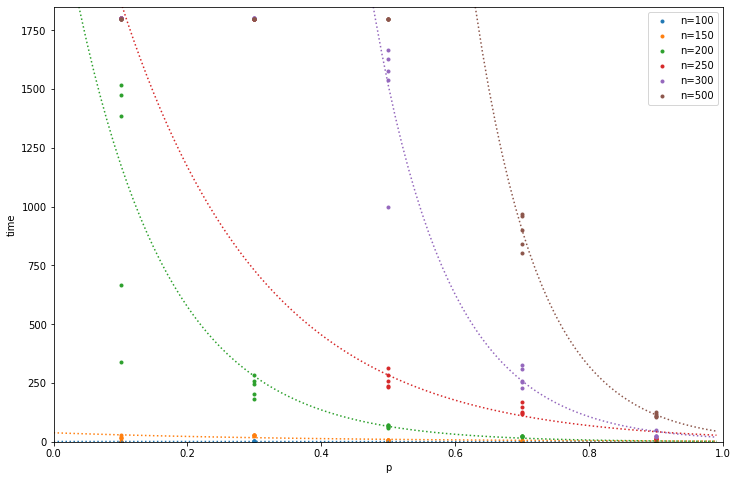

In [15]:
for i in range(len(pr.GNP_N)):
    filter = gnp_data['n'] == pr.GNP_N[i]
    data = gnp_data[filter]
    cont_x = np.arange(0, 1, 0.01)
    plt.scatter(data['p'], data['time'], label="n="+str(pr.GNP_N[i]), marker=".")
    # interpolazione curva risultati
    filter = (gnp_data['n'] == pr.GNP_N[i]) & (gnp_data['time']<1799)
    data = gnp_data[filter]
    x = data['p']
    y = data['time']
    fit = np.polyfit(x, np.log(y), 1, w=np.sqrt(y))
    ax = plt.gca()
    ax.plot(cont_x, np.exp(fit[0]*cont_x)*np.exp(fit[1]), linestyle=":")   
    ax.set_ylim(top=1850, bottom=0)
    ax.set_xlim(left=0, right=1)
    ax.set_xlabel('p')
    ax.set_ylabel('time')
plt.legend(loc="best")

fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.savefig('document/images/gnp-2d.eps', format='eps')

plt.show()

Even studying how the size of the graph influences the computational difficulty of the associated LP problem might outline interesting trends related to this specific parameter.

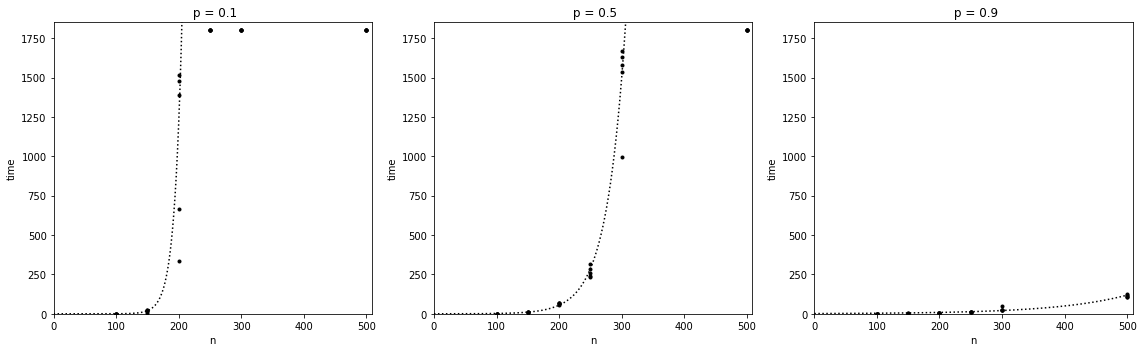

In [13]:
def size_impact_gnp(p, ax):
    filter = gnp_data['p'] == p
    data = gnp_data[filter]
    x = data['n']
    cont_x = range(0, np.max(x))
    y = data['time']
    ax.scatter(x, y, marker=".", color="black")
    filter = (gnp_data['p'] == p) & (gnp_data['time']<1799)
    data = gnp_data[filter]
    x = data['n']
    y = data['time']
    fit = np.polyfit(x, np.log(y), 1, w=np.sqrt(y))
    ax.plot(cont_x, np.exp(fit[0]*cont_x)*np.exp(fit[1]), linestyle=":", color="black")   
    ax.set_ylim(top=1850, bottom=0)
    ax.set_xlim(left=0, right=np.max(cont_x)+10)
    ax.set_xlabel('n')
    ax.set_ylabel('time')
    ax.set_title(" p = " + str(p))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(16, 5)
size_impact_gnp(0.1, ax1)
size_impact_gnp(0.5, ax2)
size_impact_gnp(0.9, ax3)
plt.tight_layout()
fig.savefig('document/images/gnp_p.eps', format='eps')
plt.show()

To summarize the different graphs given above, plot a 3-dimensional graph comprehensive of all the information and trends analyzed before. 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


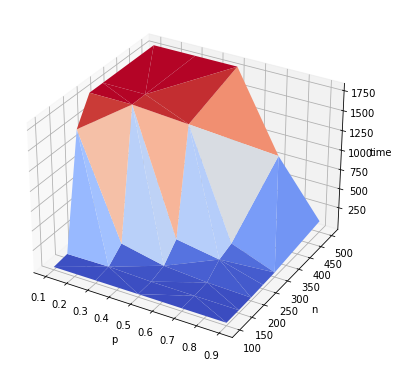

In [14]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
z = np.ravel(gnp_data['time'])
y = np.ravel(gnp_data['n'])
x = np.ravel(gnp_data['p'])

ax.set_xlabel('p')
ax.set_ylabel('n')
ax.set_zlabel('time')
ax.plot_trisurf(x, y, z, cmap=cm.coolwarm, antialiased=True)

fig = plt.gcf()
fig.set_size_inches(12, 6.5)
fig.savefig('document/images/gnp-3d.eps', format='eps')
plt.show()

### Hypothesis
The plots above outline an inverse exponential correlation between the probability to generate each edge of the graph *p* and the solution time of the MIP vertex cover instance. Therefore, the probability *p* may represent a key factor in determing the complexity in the computing of the vertex cover set associated to the graph. Also the number of nodes of the graph plays an important role in determing the complexity of the problem, and even in this case the two measures are bounded by an exponential correlation. 

Deducing the right parameters *a* and *b* of the exponential formula 
<a href="https://www.codecogs.com/eqnedit.php?latex=y&space;=&space;ae^{-bx}" target="_blank"><img src="https://latex.codecogs.com/gif.latex?y&space;=&space;ae^{-bx}" title="y = ae^{-bx}" /></a>

might be the next step of the experiments. However, current available data are surely not enough to perform such an elaborate job. In order to compensate this lack, the list of parameters used to generate the Erdős–Rényi graph should be expanded. In particular:
* likelihoods list should be expanded, including all the probability values between 0 and 1, sampled using 0.05 steps
* node number list might be expanded, including also 300 and 400 dimensions (or varying with a step of 50 nodes) 
* other 2 random seeds might be added

## Watts–Strogatz small-world graph
Watts-Strogatz graphs are generated using the Watts–Strogatz model (proposed by Duncan J. Watts and Steven Strogatz). This is a random graph generation model that produces graph with small-world properties (e.g. high clustering and short average path length). In this experiments, graph are generated using the `watts_strogatz_graph` method of the Networkx package. 

The graph generation is composed of three main stages. Firstly, the *n* nodes of the graph are wired together in a ring form. Then, each node is connected to its *k* nearest neighbors (*k-1* if *k* is not even), *k/2* on each side. Finally, rewire each node's *k/2* rightmost edges (with a probability *p*) with a random node of the graph (checks to avoid self-loops and duplicates in this stage).

First of all, check the correlation between the solution time (y axis) and the number of initial neighbors of each node *k*, for fixed values of rewiring probability *p*.

In [ ]:
def correlation_wsg(p, ax):
    for i in range(len(pr.WS_N)):
        filter = np.logical_and(wsg_data['n'] == pr.WS_N[i], wsg_data['p'] == p)
        data = wsg_data[filter]
        ax.scatter(data['k'], data['time'], label=str(pr.WS_N[i]), marker=".")
        ax.set_xlabel('k')
        ax.set_ylabel('time')
        ax.legend(loc="best")
        ax.set_title(" p = " + str(p))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(14, 4)
correlation_wsg(0.1, ax1)
correlation_wsg(0.5, ax2)
correlation_wsg(0.9, ax3)
plt.tight_layout()
plt.show()

To better visualize the correlation between all the three parameters used to generate a graph of this type, plot a 3-dimensional scatter graph where the correlation between solution time, *k*, *p* and size of the graph is displayed. 

In [ ]:
ax = plt.axes(projection='3d')
for i in range(len(pr.WS_N)):
    filter = wsg_data['n'] == pr.WS_N[i]
    data = wsg_data[filter]
    p = data['p']
    k = data['k']
    t = data['time']
    ax.scatter(p, k, t, label=pr.WS_N[i], marker=".")
    
ax.set_xlabel('p')
ax.set_ylabel('k')
ax.set_zlabel('time')
ax.legend(loc="upper left")

fig = plt.gcf()
fig.set_size_inches(12, 6.5)
#fig.savefig('prova.svg')
plt.show()

### Hypothesis
In this case, the combination of high rewiring probability and high number of nodes initially wired together seems to have the higher impact on the computation time needed by CPLEX in order to solve the problem. 

Even in this case, current available data are surely not enough to perform such an elaborate job. In order to compensate this lack, the list of parameters used to generate the Watts-Strogatz graph should be expanded. In particular:
* probabilities list should be expanded, including all the probability values between 0 and 1, sampled using 0.05 steps
* number of initial nodes wired together *k* might be expanded
* node number list might be expanded, including also 300 and 400 dimensions (optional)
* other 2 random seeds might be added

## Regular graphs
Regular graphs are a particular class of graphs where each vertex has the same number of neighbors. In graph theory, a regular graph where every vertex has degree *k* is also known as *k*-regular graph.

First of all, plot the correlation between the number of edges for each vertex *d* and the solution time required, for each dimension of the graph *n*.

In [ ]:
for i in range(len(pr.RR_N)):
    filter = rrg_data['n']==pr.RR_N[i]
    data = rrg_data[filter]
    plt.scatter(data['d'], data['time'], label=str(pr.RR_N[i]), marker=".")
plt.legend(loc="best")

fig = plt.gcf()
fig.set_size_inches(12, 6.5)
#fig.savefig('prova.svg')
plt.show()

As can be seen from the plot above, there seems to be an exponential correlation between the number of edges per vertex and the computation time required to solve the problem. Moreover, even the size of the graph seems to play a key role in determinating the complexity of the solution, as the exponential curve grows far faster for high-dimensional graphs than for smaller ones. 

To give a different representation of data plot a 3-dimensional graph as already done for the other categories of graph.

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
z = np.ravel(rrg_data['time'])
y = np.ravel(rrg_data['n'])
x = np.ravel(rrg_data['d'])


ax.set_xlabel('d')
ax.set_ylabel('n')
ax.set_zlabel('time')
ax.plot_trisurf(x, y, z, cmap=cm.coolwarm, antialiased=True)

plt.show()

### Hypothesis
In this particular type of graph the resolution difficulty seems to be highly correlated to the combination of high graph dimensionality and high number of edges wired to each vertex.  

However, the data collected by now are not enough to define a general trend, and a more deep analysis may be required in order to deduce a defined trend. Possible expansions of the parameters set might be:
* additional graph dimensionalities (step of 50 nodes between 50 and 500 might be good)
* more *d* values (especially between 5 and 10)
* other 2 random seeds may be added to the seed set

## Barabási–Albert graphs
Barabási–Albert graphs are a particular class of graphs generated using the Barabási–Albert model. This algorithm is based on a *preferential attachment* mechanism, which grows the graph by wiring new nodes with *m* edges to the existing nodes of the graph with higher degree. Random graphs generated using this model are particularly similar to many scale-free networks that describe several natural and artificial systems in the real world (e.g. the Internet, citation networks and some social networks). The Barabási–Albert model have therefore the ability to generate networks with hubs (few nodes of the graph with impressively high degree compared to all the other nodes of the same graph). 

First of all, try to plot the correlation between the avg clustering index and the solution time required for each instance, in order to verify whether there is such a correlation as in the Erdős–Rényi graphs or not. 

In [ ]:
for i in range(len(pr.BA_M)):
    filter = bag_data['m']==pr.BA_M[i]
    data = bag_data[filter]
    plt.scatter(data['n'], data['time'], label="n="+str(pr.BA_M[i]), marker=".")
    # interpolazione curva risultati
    filter = (bag_data['m'] == pr.BA_M[i]) & (bag_data['time']<1799)
    data = bag_data[filter]
    cont_x = np.arange(0, 500, 1)
    x = data['n']
    y = data['time']
    fit = np.polyfit(x, np.log(y), 1, w=np.sqrt(y))
    ax = plt.gca()
    ax.plot(cont_x, np.exp(fit[0]*cont_x)*np.exp(fit[1]), linestyle=":")   
    ax.set_ylim(top=1850, bottom=0)
    ax.set_xlim(left=0, right=520)
    
plt.legend(loc="best")

fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.savefig('document/images/bag.eps', format='eps')
plt.show()

Then, plot a 3-dimensional graph that displays the combined action of the two parameters used to generate the graphs, the number of nodes and the initial edges wired to each new node, and their effect on the solution time required by CPLEX.

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
z = np.ravel(bag_data['time'])
y = np.ravel(bag_data['n'])
x = np.ravel(bag_data['m'])

ax.set_xlabel('m')
ax.set_ylabel('n')
ax.set_zlabel('time')
ax.plot_trisurf(x, y, z, cmap=cm.coolwarm, antialiased=True)

fig = plt.gcf()
fig.set_size_inches(12, 6.5)
fig.savefig('document/images/bag-3d.eps', format='eps')
plt.show()

### Hypothesis
In this particular type of graph the resolution difficulty seems to be highly correlated to the combination of high graph dimensionality and high number of edges initially wired to each node.  

However, the data collected by now are not enough to define a general trend, and a more deep analysis may be required in order to deduce a defined trend. Possible expansions of the parameters set might be:
* additional graph dimensionalities (step of 50 nodes between 50 and 500 might be good)
* more *m* values (especially between 5 and 10)
* other 2 random seeds may be added to the seed set

## Overall considerations
* Initially, a correlation between the average clustering index of the graph and the solution time was analyzed. However, this parameter have not demonstrated a strong relation with the computational time required to solve the problem. Thus, this hypothesis was discarded.
* While for the other categories of graph studied the more edges are created the more complex is the associated vertex cover problem, for Erdős–Rényi graphs seems to be valid the opposite. In fact, for higher values of probability *p* the complexity of the problem decreases. However, this effect might be due to the extremely higher number of edges charateristic of this particular kind of graph, as shown in the plot below. Studying in the details the trend for the case where *n*=100 (which has a number of nodes comparable to that of the other type of graphs), it is possible to see that the complexity of the problem has a maximum in for *p*=0.5, whereas the other two extremes seem to be less difficult to solve (plot below). 

In [ ]:
data = []
for i in range(len(pr.GNP_N)):
    data.append([])
    filter = gnp_data['n']==pr.GNP_N[i]
    data[i].append(np.average(gnp_data[filter]['edges']))
    filter = wsg_data['n']==pr.GNP_N[i]
    data[i].append(np.average(wsg_data[filter]['edges']))
    filter = rrg_data['n']==pr.GNP_N[i]
    data[i].append(np.average(rrg_data[filter]['edges']))
    filter = bag_data['n']==pr.GNP_N[i]
    data[i].append(np.average(bag_data[filter]['edges']))

labels = ['gnp', 'wsg', 'rrg', 'bag']
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - 2*width/3, data[0], width, label='100')
rects2 = ax.bar(x            , data[1], width, label='200')
rects3 = ax.bar(x + 2*width/3, data[2], width, label='500')

ax.set_ylabel('edges')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [ ]:
def size_impact_gnp(size, ax):
    filter = gnp_data['n'] == size
    data = gnp_data[filter]
    ax.scatter(data['p'], data['time'], marker=".")
    ax.set_xlabel("p")
    ax.set_ylabel("time")
    ax.set_title(" n = " + str(size))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(16, 5)
size_impact_gnp(100, ax1)
size_impact_gnp(150, ax2)
size_impact_gnp(200, ax3)
plt.tight_layout()
plt.show()

* The dimension of the graph in each category analized seems to play an important, but not determinant, role. In fact, in all the experiments performed the complexity grows exponentially with the size of the problem. However, it's not the growth of the number of nodes that makes the problem diverge in any of the experiments perfomed (even if it has a key role in amplifiying the action of others determinatig parameters still not identified).
